In [7]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from IPython.display import display, Image
import math
import seaborn as sbn
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume
pd.options.display.max_colwidth = 300
pd.options.display.width = 300
pd.options.display.float_format = '{:.3f}'.format

In [3]:
def mag(p):
    return np.sqrt(np.sum(np.square(p)))

In [4]:
c = 0
points = {
    'sensor': [],
    'time': [],
    'ax': [],
    'ay': [],
    'az': [],
    'xyz': [],
}
with open('values.csv') as f:
    r = csv.reader(f)
    for row in r:
        c += 1
        if c >= 119 and len(row) == 8:
            points['sensor'].append(row[0])
            points['time'].append(float(row[1]))
            points['ax'].append(float(row[2]))
            points['ay'].append(float(row[3]))
            points['az'].append(float(row[4]))
            xyz = np.array([float(row[2]), float(row[3]), float(row[4])])
            xyz /= mag(xyz)
            points['xyz'].append(xyz)
points = pd.DataFrame(points)
d = {
    'CF:CF:2F:51:CA:2E': 'hip',
    'E0:5B:41:FE:20:24': 'back', 
    'D2:C0:A5:F4:45:84': 'shoulder', 
    'C0:09:55:11:5C:0F': 'head'
}
points['sensor'].replace(d, inplace=True)

In [5]:
points

,sensor,time,ax,ay,az,xyz
0,hip,1572102040.162,1052.000,-420.000,-19026.000,"[0.055195021754992496, -0.02203603530142286, -0.9982323991544556]"
1,hip,1572102041.197,1106.000,-364.000,-19146.000,"[0.057660107715683834, -0.018976744311490882, -0.9981558972192429]"
2,hip,1572102042.187,1060.000,-338.000,-19124.000,"[0.055334171630386425, -0.01764429246327416, -0.9983119794901038]"
3,hip,1572102043.177,1090.000,-350.000,-19100.000,"[0.05696582812969503, -0.018291779674672715, -0.998208547960711]"
4,hip,1572102044.167,1110.000,-322.000,-19124.000,"[0.05793654318806557, -0.016806817032934337, -0.9981787855212305]"
...,...,...,...,...,...,...
42493,head,1573385965.987,190.000,-376.000,14844.000,"[0.01279463275337936, -0.025319904817213894, 0.9995975189008591]"
42494,head,1573385966.977,106.000,-420.000,14944.000,"[0.0070901697982306425, -0.02809312561563085, 0.9995801647618747]"
42495,head,1573385967.967,104.000,-394.000,15024.000,"[0.006919712935413056, -0.026215066313007154, 0.9996323763619784]"
42496,head,1573385968.957,136.000,-402.000,15010.000,"[0.009057006985109204, -0.026771447117749262, 0.9996005503418319]"


In [6]:
class Seq: 
    a = None
    b = None
  
    # default constructor 
    def __init__(self, g): 
        self.g = g
        self.a = self.n()
        self.b = self.n()
  
    # a method for printing data members 
    def closest(self, row):
        while (self.b is not None) and (self.b.time < row.time):
            self.a = self.b
            self.b = self.n()
            if self.b is not None and self.b.time < self.a.time:
                print('out of order!')
        if self.b is None:            
            return self.a
        if (abs(row.time - self.a.time) < abs(self.b.time - row.time)):
            return self.a
        return self.b
    
    def n(self):
        try:
            return next(self.g)
        except StopIteration:
            return None
        

In [60]:
c = 0
scores = {
    'time': [],
    'category': [],
}
with open('scores_nrf51.csv') as f:
    r = csv.reader(f)
    for row in r:
        c += 1
        if (len(row) == 2):
            t = row[0]
            t = t[6:-4]
            scores['time'].append(float(t))
            scores['category'].append(row[1])
scores = pd.DataFrame(scores)
scores['value'] = scores['category'].map({
    'good': -1, 
    'bad': 0, 
    'standing': 1
})
scores = scores.dropna()
scores.sort_values('time', inplace=True)
scores

,time,category,value
504,1572103017.000,good,-1.000
598,1572103038.000,good,-1.000
702,1572103048.000,good,-1.000
80,1572103069.000,good,-1.000
126,1572103079.000,good,-1.000
...,...,...,...
703,1572114252.000,standing,1.000
127,1572114262.000,standing,1.000
73,1572114272.000,standing,1.000
808,1572114282.000,standing,1.000


In [8]:
def get_part(df):
    return df[df.time > 1572103051][df.time < 1572104051]

In [9]:
def get_part(df):
    return df

In [10]:
print(points[points.sensor=='back'])

      sensor           time       ax         ay         az                                                               xyz
12      back 1572102051.820 1636.000   -548.000 -18080.000  [0.09007750853355136, -0.03017266178263212, -0.9954776004196874]
14      back 1572102052.810 1650.000   -564.000 -18106.000  [0.09071031421967812, -0.03100643467872634, -0.9953945147039346]
16      back 1572102053.845 1626.000   -548.000 -18040.000  [0.0897280789823542, -0.030240459583228848, -0.9955071001486284]
18      back 1572102054.835 1670.000   -536.000 -18098.000  [0.09184509812830924, -0.02947842670465494, -0.9953368778000842]
20      back 1572102055.825 1666.000   -532.000 -18106.000   [0.09158744034845985, -0.0292464095230376, -0.9953674639551106]
...      ...            ...      ...        ...        ...                                                               ...
42145   back 1572114295.573 8492.000 -13794.000   3834.000     [0.5101537491154199, -0.8286694318532857, 0.2303261274268158]


In [2]:
def q_multiply(a, b):
    w0, x0, y0, z0 = a
    w1, x1, y1, z1 = b
    return np.array([-x1 * x0 - y1 * y0 - z1 * z0 + w1 * w0,
                     x1 * w0 + y1 * z0 - z1 * y0 + w1 * x0,
                     -x1 * z0 + y1 * w0 + z1 * x0 + w1 * y0,
                     x1 * y0 - y1 * x0 + z1 * w0 + w1 * z0], dtype=np.float64)

In [3]:
def q_rotate(q, a, p):
    p = p / 2
    s = np.sin(p)
    x, y, z = a
    return q_multiply(q_multiply([np.cos(p), s * x, s * y, s * z], q), [np.cos(-p), -s * x, -s * y, -s * z])

In [4]:
def to_q(xyz):
    return [0, xyz[0], xyz[1], xyz[2]]

def to_xyz(q):
    return q[1:]

In [5]:
def rotate(a, b, p):
    return to_xyz(q_rotate(to_q(a), b, p))

In [11]:
rotate([1, 0, 0], [0, 0, 1], 3.141 / 2)

array([ 2.96326791e-04, -9.99999956e-01,  0.00000000e+00])

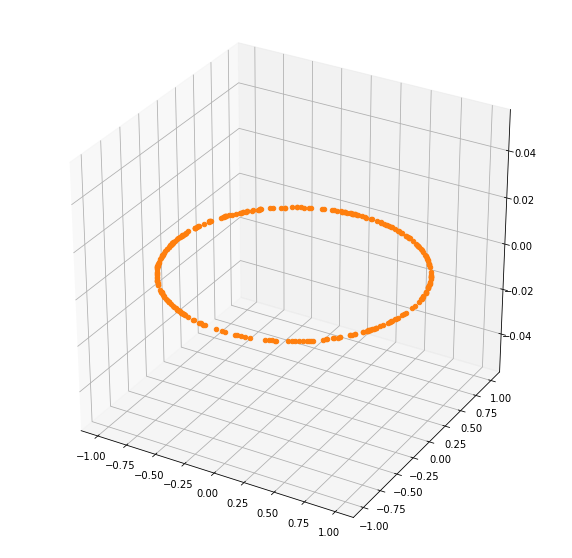

In [15]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for x in [rotate([1, 0, 0], [0, 0, 1], x) for x in np.random.rand(300) * np.pi * 2]:
    ax.scatter(x[0], x[1], x[2], color='C1')

In [16]:
def xyz_multiply(a, b):
    x0, y0, z0 = a
    x1, y1, z1 = b
    return q_multiply([0, x0, y0, z0], [0, x1, y1, z1])

In [17]:
def angle(a, b):
    x = np.dot(a, b)
    return np.arccos(abs(x) / mag(a) / mag(b))

In [36]:
def normalize(xyz):
#     return xyz
    p = 2 * np.pi
    while p > 1e-5:
        t = rotate(xyz, [0, 0, 1], p)
        if (t[0] > xyz[0]):
            xyz = t
        t = rotate(xyz, [0, 0, 1], -p)
        if (t[0] > xyz[0]):
            xyz = t
        p *= 0.8
    return xyz

In [47]:
def fill_aux(sensors):
    sensors['nhead'] = sensors.apply(lambda x: normalize(x['head']), axis=1)
    sensors['nback'] = sensors.apply(lambda x: normalize(x['back']), axis=1)
    sensors['nshoulder'] = sensors.apply(lambda x: normalize(x['shoulder']), axis=1)
    sensors['nhip'] = sensors.apply(lambda x: (x['hip']), axis=1)
    
    sensors['head_a'] = sensors.apply(lambda x: angle(x['nhead'], x['nback']), axis=1)
    sensors['shoulder_a'] = sensors.apply(lambda x: angle(x['nshoulder'], x['nback']), axis=1)
    sensors['hip_a'] = sensors.apply(lambda x: angle(x['nhip'], x['nback']), axis=1)
    
    sensors['head_q'] = sensors.apply(lambda x: xyz_multiply(x['nhead'], x['nback']), axis=1)
    sensors['shoulder_q'] = sensors.apply(lambda x: xyz_multiply(x['nshoulder'], x['nback']), axis=1)
    sensors['hip_q'] = sensors.apply(lambda x: xyz_multiply(x['nhip'], x['nback']), axis=1)
    
    sensors['zhead'] = sensors.apply(lambda x: x['nhead'][2], axis=1)
    sensors['zshoulder'] = sensors.apply(lambda x: x['nshoulder'][2], axis=1)
    sensors['zhip'] = sensors.apply(lambda x: x['nhip'][2], axis=1)
    sensors['zback'] = sensors.apply(lambda x: normalize(x['nback'])[2], axis=1)

In [20]:
sensors = {
    'time': [],
    'head': [],
    'shoulder': [],
    'back': [],
    'hip': [],
}
head_seq = Seq(points[points.sensor=='head'].itertuples())
hip_seq = Seq(points[points.sensor=='hip'].itertuples())
shoulder_seq = Seq(points[points.sensor=='shoulder'].itertuples())
i = 0
for s in points[points.sensor=='back'].itertuples():
    i+=1
    hd = head_seq.closest(s)
    if hd is None or abs(hd.time - s.time) > 5:
        continue
    hp = hip_seq.closest(s)
    if hp is None or abs(hp.time - s.time) > 5:
        continue
    sh = shoulder_seq.closest(s)
    if sh is None or abs(sh.time - s.time) > 5:
        continue
    sensors['time'].append(s.time)
    sensors['head'].append(hd.xyz)
    sensors['back'].append(s.xyz)
    sensors['hip'].append(hp.xyz)
    sensors['shoulder'].append(sh.xyz)
sensors = pd.DataFrame(sensors)
sensors

,time,head,shoulder,back,hip
0,1572102126.835,"[0.06883722059058847, -0.018938215247488017, -0.9974481345235965]","[0.0015535576744452504, -0.03873537134950158, -0.999248296203185]","[0.09145509294393073, -0.03044839031907309, -0.9953435896722268]","[0.0570743784189027, -0.01975651560654324, -0.998174431359161]"
1,1572102127.825,"[0.06883722059058847, -0.018938215247488017, -0.9974481345235965]","[0.0003099469729998357, -0.0382267933366464, -0.9992690409514703]","[0.09294140464019714, -0.03204496297428598, -0.9951557745657127]","[0.05726414038529551, -0.018006274490440267, -0.9981966701531858]"
2,1572102128.814,"[0.06883722059058847, -0.018938215247488017, -0.9974481345235965]","[0.001956754350065802, -0.037796255077586806, -0.9992835504572882]","[0.09185969006098903, -0.03087628338174392, -0.995293149010094]","[0.05633941276308222, -0.020944019614528707, -0.9981919748284381]"
3,1572102129.849,"[0.06883722059058847, -0.018938215247488017, -0.9974481345235965]","[0.001446693494303126, -0.03864738334781208, -0.9992518635650877]","[0.09321142700363401, -0.02832573400110433, -0.9952433283721347]","[0.057499676709520574, -0.019410054206843608, -0.9981568198304253]"
4,1572102130.840,"[0.06883722059058847, -0.018938215247488017, -0.9974481345235965]","[-0.00010334807882428246, -0.03813544108616023, -0.9992725741519871]","[0.08980552299873981, -0.03111198708310151, -0.9954732604639182]","[0.05657528412496516, -0.017810737594896438, -0.9982394576716075]"
...,...,...,...,...,...
8840,1572114295.573,"[0.7052165731479906, -0.43728562878275745, -0.5580778295340834]","[-0.9494262427714859, 0.13592155622275892, 0.28304618013815835]","[0.5101537491154199, -0.8286694318532857, 0.2303261274268158]","[0.9742901468192784, -0.13151260220347008, -0.1829293450284584]"
8841,1572114296.585,"[0.7271613975555162, -0.3729377609900999, -0.5763277959050732]","[-0.9504061027141445, 0.12398368747981783, 0.2852302318524771]","[0.5120361257943117, -0.8272456604962747, 0.23126526559696375]","[0.9732229313331329, -0.129869758016497, -0.189660148370923]"
8842,1572114297.598,"[0.7218939067027501, -0.35758700154999645, -0.5924531405840668]","[-0.9524569051176943, 0.1300332948254709, 0.2755307353644156]","[0.5129547497884088, -0.8274968323119609, 0.22831210476709546]","[0.9724170262810005, -0.12880300676901932, -0.1944605678436524]"
8843,1572114298.573,"[0.7925897482607935, -0.322942090375855, -0.5172135895503569]","[-0.9559239753861271, 0.10531686494886082, 0.2740761048309875]","[0.5696457937009942, -0.7916968084621896, 0.22072569671324477]","[0.9718827663263608, -0.20667766668371826, -0.1128194602539563]"


In [21]:
scores

,time,category,value
504,1572103017.000,good,-1.000
598,1572103038.000,good,-1.000
702,1572103048.000,good,-1.000
80,1572103069.000,good,-1.000
126,1572103079.000,good,-1.000
...,...,...,...
673,1572113310.000,good,-1.000
209,1572113320.000,bad,0.000
369,1572113340.000,bad,0.000
321,1572113351.000,bad,0.000


In [61]:
data = {
    'time': [],
    'score': [],
    'back': [],
    'head': [],
    'shoulder': [],
    'hip': [],
}
s_seq = Seq(sensors.itertuples())
for s in scores.dropna().itertuples():
    x = s_seq.closest(s)
    if abs(s.time - x.time) > 10:
        continue
    data['time'].append(s.time)
    data['score'].append(s.value)
    data['back'].append(x.back)
    data['hip'].append(x.hip)
    data['shoulder'].append(x.shoulder)
    data['head'].append(x.head)
data = pd.DataFrame(data)
fill_aux(data)
data

,time,score,back,head,shoulder,hip,nhead,nback,nshoulder,nhip,head_a,shoulder_a,hip_a,head_q,shoulder_q,hip_q,zhead,zshoulder,zhip,zback
0,1572103017.000,-1.000,"[-0.9793965891766977, 0.12689640825886542, -0.1570974941876863]","[0.4028258850139114, -0.8499067322734457, -0.3396908194211799]","[-0.4159371422254721, 0.8168215916971375, 0.3997483971883592]","[0.3630089411341062, -0.9313574770069073, -0.028244622143395653]","[0.9405371588522091, 4.3795030026247984e-06, -0.3396908194211799]","[0.9875830989280103, -5.629945972655922e-06, -0.15709749418768612]","[0.9166249063414466, -4.457679579979964e-06, 0.3997483971883588]","[0.3630089411341062, -0.9313574770069073, -0.028244622143395653]",0.189,0.569,1.199,"[-0.9822231785011837, 2.6004499082482653e-06, 0.18771688127527625, 9.620296536709963e-06]","[-0.8424437940805445, -2.9508521707327304e-06, -0.5387842367830483, 7.582196862684148e-07]","[-0.36294389787907855, -0.14631376681505393, -0.029133883555467963, -0.9197908596315284]",-0.340,0.400,-0.028,-0.157
1,1572103038.000,-1.000,"[-0.8920506611740566, 0.10309253082853052, -0.440019940441677]","[0.35320704031797207, -0.8195542712926365, -0.451193509567474]","[-0.08805788183032849, 0.934934134536181, -0.34372077843307347]","[0.2677799838133243, -0.9589685398185653, 0.09313012352179267]","[0.8924261408692352, 4.1749145169190165e-06, -0.45119350956747367]","[0.897988002138567, 5.374664927457854e-06, -0.44001994044167664]","[0.9390718963121419, 5.484438921075197e-06, -0.34372077843307325]","[0.2677799838133243, -0.9589685398185653, 0.09313012352179267]",0.012,0.105,1.370,"[-0.9999221085253854, -5.879682942851237e-07, 0.012481060880507877, -1.047468333529033e-06]","[-0.9945192925179804, 5.658784747247705e-07, -0.10455322476709256, -1.222364358828942e-07]","[-0.1994789471372622, -0.42196477923319814, -0.20145826608926465, -0.8611436824130996]",-0.451,-0.344,0.093,-0.440
2,1572103048.000,-1.000,"[-0.988011881135493, 0.12847012233013444, -0.08560344854960425]","[0.3398080751177425, -0.868965327895355, -0.3597634375537528]","[-0.4066403277537163, 0.9026350296673038, 0.14104484060700603]","[0.41324139216434436, -0.9105949259974475, -0.006959349809968633]","[0.9330435514906821, -4.600125525202118e-06, -0.3597634375537528]","[0.9963292877164155, 5.908729916858078e-06, -0.08560344854960417]","[0.9900032085391165, -4.516293344056991e-06, 0.14104484060700587]","[0.41324139216434436, -0.9105949259974475, -0.006959349809968633]",0.282,0.227,1.146,"[-0.9604156079545865, -2.5195315951839223e-06, 0.2785711038297671, -1.0096342134355231e-05]","[-0.9742952668179694, 4.467855844001922e-07, -0.2252747943041748, -1.0349376906683254e-05]","[-0.41231486579395604, -0.07795010701807153, -0.028441084213571832, -0.9072548357489957]",-0.360,0.141,-0.007,-0.086
3,1572103069.000,-1.000,"[-0.9837722883915007, 0.17340671572685093, -0.046067293536491714]","[0.39104531156977596, -0.8467713852163232, -0.3606407984104486]","[-0.4262310331330967, 0.903516255849036, 0.04455874561555994]","[0.318440089611688, -0.9450990355422165, 0.0733738532807978]","[0.932704784211181, -5.607808749556567e-06, -0.36064079841044866]","[0.9989383386601669, -4.592188398534708e-06, -0.04606729353649168]","[0.9990067658267672, 4.637821856742319e-06, 0.04455874561555994]","[0.318440089611688, -0.9450990355422165, 0.0733738532807978]",0.323,0.091,1.251,"[-0.9483283131476675, 1.3977939187364278e-06, 0.31729073494006316, -1.3186990664935817e-06]","[-0.9958934581300696, 9.029746175471637e-09, -0.09053297724427133, 9.220525340663342e-06]","[-0.31472621931533074, -0.043538491637936265, -0.08796562817934334, -0.9440941980969827]",-0.361,0.045,0.073,-0.046
4,1572103079.000,-1.000,"[-0.9924740219483146, 0.12234369610741769, -0.005228363081513576]","[0.37671563804764213, -0.8634547055220371, -0.33545685201260983]","[-0.44286782972153926, 0.8945618647247505, 0.0602258713337615]","[0.3047731837406334, -0.9483458490464847, 0.08805371695107535]","[0.9420555718299659, 4.680283596108505e-06, -0.33545685201260955]

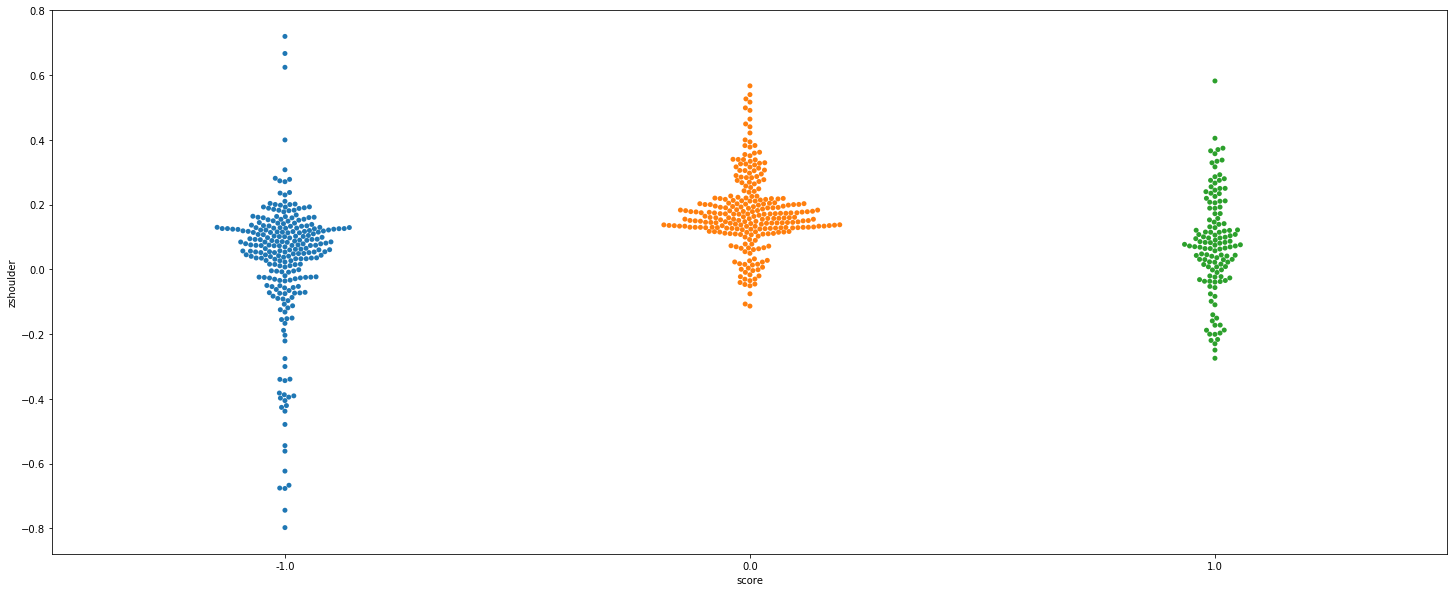

In [62]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.swarmplot(data=data, x='score', y='zshoulder');

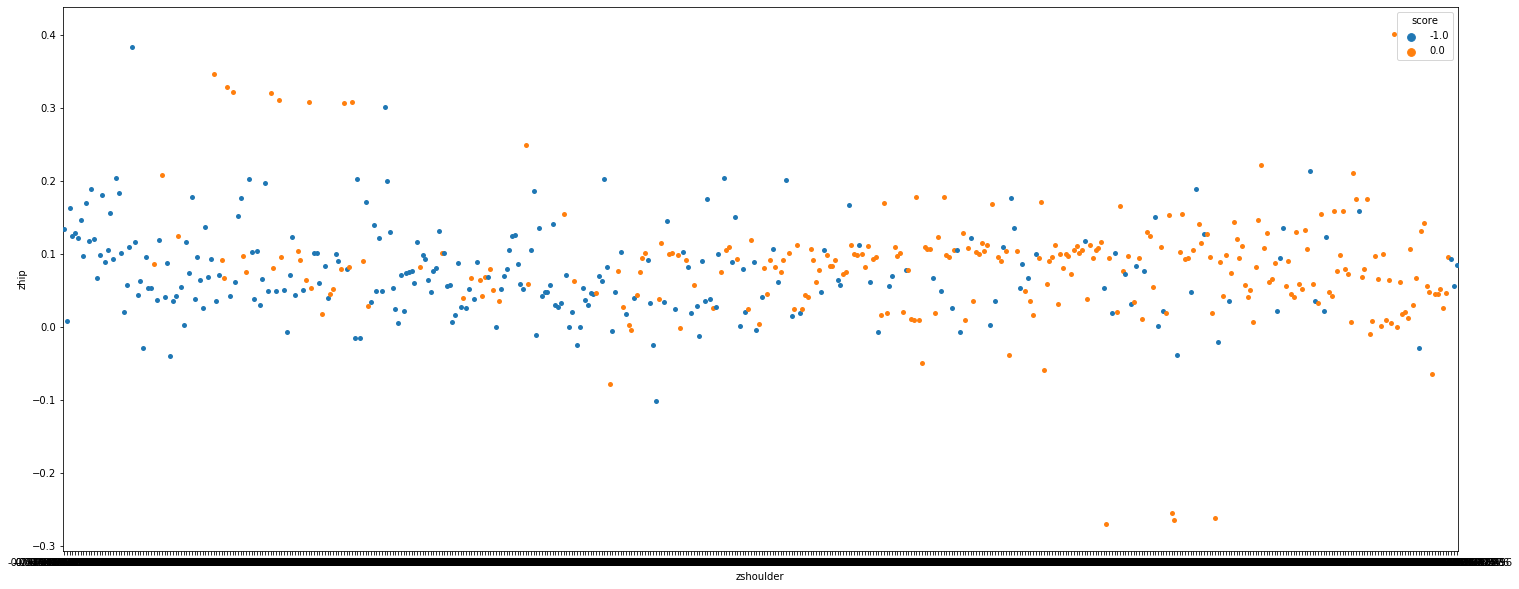

In [24]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.swarmplot(data=data, x='zshoulder', y='zhip', hue='score');

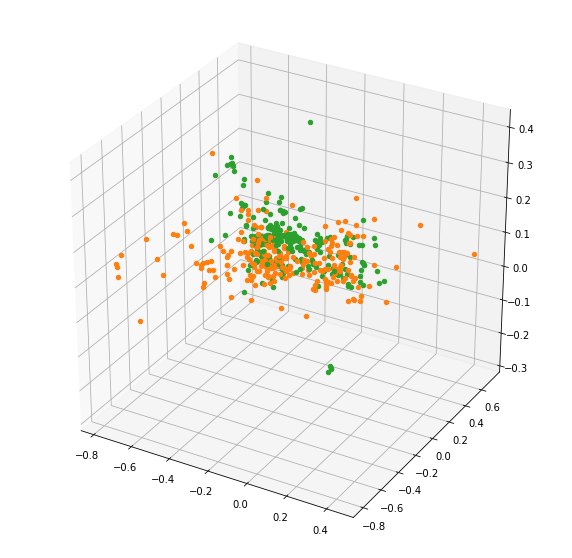

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for x in data[data.score==-1].itertuples():
    ax.scatter(x.zback, x.zshoulder, x.zhip, color='C1')
for x in data[data.score==0].itertuples():
    ax.scatter(x.zback, x.zshoulder, x.zhip, color='C2')

In [26]:
pp = data[data.score==1]
fig = plt.figure(figsize=(10,10))
ipyvolume.scatter(np.array([1]), np.array([1]), np.array([1]))

Scatter(color_selected=array('white', dtype='<U5'), line_material=ShaderMaterial(), material=ShaderMaterial(),…

<Figure size 720x720 with 0 Axes>

In [27]:
# generate random rotations 
# rdata = {
#     'score': [],
#     'back': [],
#     'head': [],
#     'shoulder': [],
#     'hip': [],
# }
# for i in range(10000):
#     r = data.iloc[np.random.randint(0, len(data))]
# #     r = data.iloc[i]
#     rdata['head'].append(rotate(r['head'], [0,0,1], np.random.rand() * np.pi * 2))
#     rdata['back'].append(rotate(r['back'], [0,0,1], np.random.rand() * np.pi * 2))
#     rdata['shoulder'].append(rotate(r['shoulder'], [0,0,1], np.random.rand() * np.pi * 2))
#     rdata['hip'].append(rotate(r['hip'], [0,0,1], np.random.rand() * np.pi * 2))
#     rdata['score'].append(r['score'])
# rdata = pd.DataFrame(rdata)
# fill_aux(rdata)
# rdata

In [28]:
def collect_axes(row, axes):
    p = []
    for a in axes:
        q = row[a]
#         print(q)
        if np.ndim(q) == 0:
            p += [q]
        else:
            for v in q:
                p += [v]
    return p

In [29]:
def matches(x, y):
    r = 0
    for xy in zip(x, y):
        if xy[0] == xy[1]:
            r+=1
    return r

In [30]:
def make_axis_predictor(axes):
    x = []
    y = []
    rx = []
    ry = []
    for i in range(len(data)):
        x += [collect_axes(data.loc[i], axes)]
        y += [data.loc[i]['score']]
#     for i in range(len(rdata)):
#         rx += [collect_axes(rdata.loc[i], axes)]
#         ry += [rdata.loc[i]['score']]
    x = np.array(x)
    y = np.array(y)
    clf = svm.SVC(gamma='auto', C=100)
    clf.fit(x, y)
    z = clf.predict(x)
#     rz = clf.predict(rx)
    return [clf, axes, (matches(y, z) / (len(z))), 0] #(matches(ry, rz) / (len(rz)))]

In [64]:
# compare all possible subsets of signals
axes = ['zback', 'zshoulder', 'zhip', 'shoulder_q', 'hip_q', 'back']
# 'shoulder_q', 'hip_q', 'head_q', 'back', 'shoulder_a', 'hip_a', 'head_a'
predictions = {
    'axes': [],
    'p': [],
    'rp': [],
}
for i in range(1, pow(2, len(axes))):
    a = []
    for j in range(len(axes)):
        if i & (1 << j):
            a += [axes[j]]
    c, a, p, rp = make_axis_predictor(a)
    predictions['axes'].append(a)
    predictions['p'].append(p)
    predictions['rp'].append(rp)
predictions = pd.DataFrame(predictions)
predictions.sort_values('p', inplace=True)
predictions

,axes,p,rp
0,[zback],0.491,0
32,"[zback, back]",0.512,0
31,[back],0.512,0
7,[shoulder_q],0.519,0
3,[zhip],0.521,0
...,...,...,...
53,"[zshoulder, zhip, hip_q, back]",0.831,0
50,"[zback, zshoulder, hip_q, back]",0.831,0
61,"[zshoulder, zhip, shoulder_q, hip_q, back]",0.831,0
54,"[zback, zshoulder, zhip, hip_q, back]",0.833,0


In [63]:
use_axes = ['zshoulder', 'zback', 'zhip']
c, a, p, rp = make_axis_predictor(use_axes)
p, rp

(0.7395348837209302, 0)

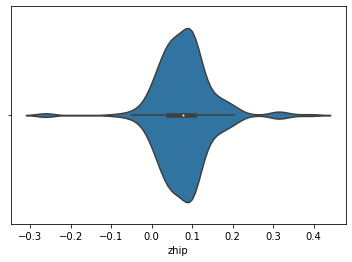

In [33]:
sbn.violinplot(x='zhip', hue='score', data=data, split=True)

In [34]:
# sensors['z'] = sensors.apply(lambda x: c.predict([np.concatenate((x['shoulder_q'], x['hip_q']), axis=0)])[0], axis=1)
data['z'] = data.apply(lambda x: c.predict([collect_axes(x, use_axes, data.columns)])[0], axis=1)
pdata['z'] = pdata.apply(lambda x: c.predict([collect_axes(x, use_axes, pdata.columns)])[0], axis=1)
len(data[data.z == data.score]) * 100 / len(data), len(pdata[pdata.z == pdata.score]) * 100 / len(pdata)

TypeError: ('collect_axes() takes 2 positional arguments but 3 were given', 'occurred at index 0')

In [ ]:
# use several points to predict
Y = Seq(scores.itertuples())
predictions = []
total = 0
good = 0
bad = []
prev = 0
for x in sensors.itertuples():
    predictions.append(x.z + 1)
    y = Y.closest(x)
    if y is not None and abs(y.time - x.time) < 1 and prev != y.time:
        bins = np.bincount(predictions[-2:])
#         print(predictions, bins)
        s = np.argmax(bins) - 1
        if not np.isnan(y.value):
            total += 1
            if y.value == s:
                good += 1
            else:
                bad.append([y.time, s, y.value])
#         print(predictions, y.category, y.value)
        predictions = []
        prev = y.time
#     if x is None or abs(x.time - s.time) > 5:
#         continue
    
print(good, total, good / total)

In [ ]:
bad

In [ ]:
def show_bad(i):
    print('predicted {} want {}'.format(bad[i][1], int(bad[i][2])))
    display(Image('./img/' + str(int(bad[i][0])) + '.jpg'))

In [ ]:
show_bad(0)